#Build UNET Model

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def Unet(inputs_shape):
    """ Encoder """
    input_shape = Input(inputs_shape)
    x = Conv2D(64, 3, padding="same")(input_shape)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(64, 3, padding="same")(x)
    x = BatchNormalization()(x)
    s1 = Activation("relu")(x)
    x = MaxPool2D((2, 2))(s1)

    x = Conv2D(128, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(128, 3, padding="same")(x)
    x = BatchNormalization()(x)
    s2 = Activation("relu")(x)
    x = MaxPool2D((2, 2))(s2)

    x = Conv2D(256, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(256, 3, padding="same")(x)
    x = BatchNormalization()(x)
    s3 = Activation("relu")(x)
    x = MaxPool2D((2, 2))(s3)

    x = Conv2D(512, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(512, 3, padding="same")(x)
    x = BatchNormalization()(x)
    s4 = Activation("relu")(x)
    x = MaxPool2D((2, 2))(s4)

    """ Bright """
    x = Conv2D(1024, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(1024, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    """ Decoder """
    x = Conv2DTranspose(512, 2, strides=2, padding="same")(x)
    x = Concatenate()([x, s4])
    x = Conv2D(512, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(512, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2DTranspose(256, 2, strides=2, padding="same")(x)
    x = Concatenate()([x, s3])
    x = Conv2D(256, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(256, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2DTranspose(128, 2, strides=2, padding="same")(x)
    x = Concatenate()([x, s2])
    x = Conv2D(128, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(128, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2DTranspose(64, 2, strides=2, padding="same")(x)
    x = Concatenate()([x, s1])
    x = Conv2D(64, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(64, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(x)
    model = Model(input_shape, outputs, name="UNET")
    return model

model = Unet((256, 256, 3))
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_144 (Conv2D)            (None, 256, 256, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 256, 256, 64  256        ['conv2d_144[0][0]']             
 Normalization)                 )                                                              

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model
model = build_unet((256, 256, 3))
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

#Metrics

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

## Example for Metrics

In [ ]:
import tensorflow as tf
import numpy as np

yTrue = np.array([[0.0, 0.0, 0.0],[ 1.0, 1.0, 1.0]])
yPred = np.array([[0.2, 0.9, 0.6],[ 0.9, 0.9, 0.8]])

y_true = tf.keras.layers.Flatten()(yTrue)
y_pred = tf.keras.layers.Flatten()(yPred)

intersection = tf.reduce_sum(y_true * y_pred)
print(intersection)

dice_coef = (2*intersection + 1e-15) / (tf.reduce_sum(y_true)+ tf.reduce_sum(y_pred)+1e-15)
print(dice_coef)

dice_loss = 1 - dice_coef
print(dice_loss)

tf.Tensor(2.6, shape=(), dtype=float32)
tf.Tensor(0.71232873, shape=(), dtype=float32)
tf.Tensor(0.28767127, shape=(), dtype=float32)


#Training data with UNET

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

""" Global parameters """
H = 256
W = 256

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))[:5000]
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))[:5000]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W, H))
    x = x / 255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (h, w)
    x = cv2.resize(x, (W, H))   ## (h, w)
    x = x / 255.0               ## (h, w)
    x = x.astype(np.float32)    ## (h, w)
    x = np.expand_dims(x, axis=-1)## (h, w, 1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(X, Y, batch=2):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset

"""---------- Main ----------- """

""" Hyperparameters """
batch_size = 32
lr = 1e-4
num_epochs = 100
model_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_model_5000_unet.h5"
csv_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_log_5000_unet.csv"

""" Dataset """
dataset_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/new_data"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test : {len(test_x)} - {len(test_y)}")

train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

""" Model """
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])

""" Traning """
callbacks = [
    ModelCheckpoint(model_path, verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-9, verbose=1),
    CSVLogger(csv_path)
    # EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
]

model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=callbacks
)

Train: 3000 - 3000
Valid: 1000 - 1000
Test : 1000 - 1000
Epoch 1/100
94/94 [==============================] - ETA: 0s - loss: 0.8311 - dice_coef: 0.1692 
Epoch 1: val_loss improved from inf to 0.95974, saving model to /content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_model_5000_unet.h5
94/94 [==============================] - 2641s 27s/step - loss: 0.8311 - dice_coef: 0.1692 - val_loss: 0.9597 - val_dice_coef: 0.0401 - lr: 1.0000e-04
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 0.6790 - dice_coef: 0.3211
Epoch 2: val_loss did not improve from 0.95974
94/94 [==============================] - 177s 2s/step - loss: 0.6790 - dice_coef: 0.3211 - val_loss: 0.9770 - val_dice_coef: 0.0229 - lr: 1.0000e-04
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.5922 - dice_coef: 0.4081
Epoch 3: val_loss did not improve from 0.95974
94/94 [==============================] - 180s 2s/step - loss: 0.5922 - dice

#Test Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

""" Global parameters """
H = 256
W = 256

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))[:5000]
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))[:5000]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)


"""--------------Main----------------"""

""" Directory for storing files """
create_dir("results")

""" Load the model """
with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_model_5000_unet.h5")

""" Dataset """
dataset_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/new_data"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

""" Prediction and Evaluation """
SCORE = []
for x, y in tqdm(zip(test_x, test_y), total=len(test_y)):
    """ Extracting the name """
    name = x.split("/")[-1]

    """ Reading the image """
    image = cv2.imread(x, cv2.IMREAD_COLOR) # [H, w, 3]
    image = cv2.resize(image, (W, H))       # [H, w, 3]
    x = image/255.0                         # [H, w, 3]
    x = np.expand_dims(x, axis=0)           # [1, H, w, 3]

    """ Reading the mask """
    mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (W, H))

    """ Prediction """
    y_pred = model.predict(x, verbose=0)[0]
    y_pred = np.squeeze(y_pred, axis=-1)
    y_pred = y_pred >= 0.5
    y_pred = y_pred.astype(np.int32)

    """ Saving the prediction """
    save_image_path = os.path.join("results", name)
    save_results(image, mask, y_pred, save_image_path)

    """ Flatten the array """
    mask = mask/255.0
    mask = (mask > 0.5).astype(np.int32).flatten()
    y_pred = y_pred.flatten()

    """ Calculating the metrics values """
    f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
    jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
    recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    SCORE.append([name, f1_value, jac_value, recall_value, precision_value])

""" Metrics values """
score = [s[1:]for s in SCORE]
score = np.mean(score, axis=0)

print("\n")
print(f"F1: {score[0]:0.5f}")
print(f"Jaccard: {score[1]:0.5f}")
print(f"Recall: {score[2]:0.5f}")
print(f"Precision: {score[3]:0.5f}")

df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision"])
df.to_csv("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_score_5000_unet.csv")

100%|██████████| 1000/1000 [24:41<00:00,  1.48s/it]




F1: 0.86808
Jaccard: 0.79341
Recall: 0.86489
Precision: 0.89872


## Example for Jaccard

## Compare

In [ ]:
import numpy as np

a = np.array([[False, True, False ]])

a.astype(np.int32)

array([[0, 1, 0]], dtype=int32)

# Chart for Training

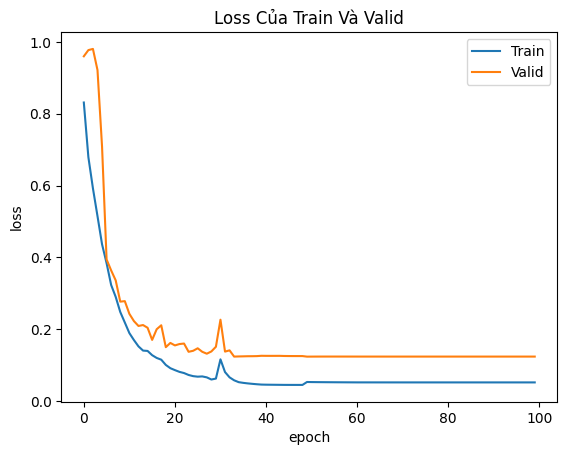

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Metrics_log_5000_unet.csv")

plt.plot(range(len(df['loss'].values)), df['loss'].values, label = 'Train')
plt.plot(range(len(df['val_loss'].values)), df['val_loss'].values, label = 'Valid')
plt.title('Loss Của Train Và Valid')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

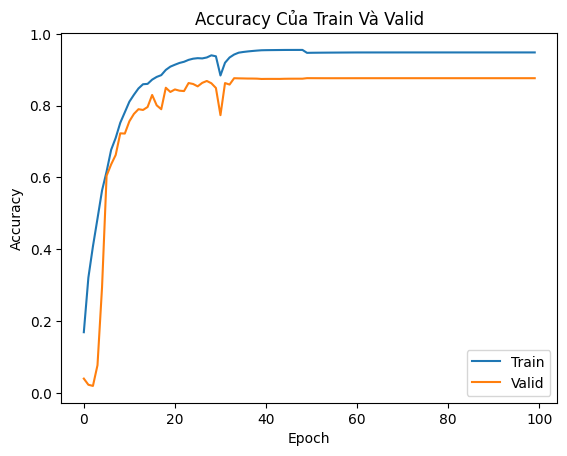

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Metrics_log_5000_unet.csv")

plt.plot(range(len(df['dice_coef'].values)), df['dice_coef'].values, label = 'Train')
plt.plot(range(len(df['val_dice_coef'].values)), df['val_dice_coef'].values, label = 'Valid')
plt.title('Accuracy Của Train Và Valid')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##https://machinelearningmastery.com/upsampling-and-transpose-convolution-layers-for-generative-adversarial-networks/

# Self - questions

## IoU and Jaccard

In [ ]:
from tensorflow.keras.metrics import IoU
from sklearn.metrics import jaccard_score
import numpy as np

m = IoU(num_classes=2, target_class_ids=[1])
m.update_state([0, 0, 0, 1], [0, 0, 1, 1])
print("IoU: ",m.result().numpy())

y_true = np.array([0, 0, 0, 1])
y_pred = np.array([0, 0, 1, 1])

print("Jaccard: ",jaccard_score(y_true, y_pred, average="binary"))

IoU:  0.5
Jaccard:  0.5


## Conv2DTranspose

###formula:
- Padding==Same:
H = H1 * stride

- Padding==Valid: H = (H1-1) * stride + HF
#### Notes: H = output size, H1 = input size, HF = height of filter

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose, Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input((2, 2, 1)))
model.add(Conv2DTranspose(1, kernel_size = 2, strides=2, padding = "same"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2DT  (None, 4, 4, 1)          5         
 ranspose)                                                       
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import IoU

""" Global parameters """
H = 256
W = 256

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))[:5000]
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))[:5000]

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


def save_results(image, mask, y_pred, save_image_path):
    mask = np.expand_dims(mask, axis=-1)
    mask = np.concatenate([mask, mask, mask], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)


"""--------------Main----------------"""

""" Directory for storing files """
create_dir("results")

""" Load the model """
with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_model_5000_unet.h5")

""" Dataset """
dataset_path = "/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/new_data"
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

""" Prediction and Evaluation """
SCORE = []
for x, y in tqdm(zip(test_x, test_y), total=len(test_y)):
    """ Extracting the name """
    name = x.split("/")[-1]

    """ Reading the image """
    image = cv2.imread(x, cv2.IMREAD_COLOR) # [H, w, 3]
    image = cv2.resize(image, (W, H))       # [H, w, 3]
    x = image/255.0                         # [H, w, 3]
    x = np.expand_dims(x, axis=0)           # [1, H, w, 3]

    """ Reading the mask """
    mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (W, H))

    """ Prediction """
    y_pred = model.predict(x, verbose=0)[0]
    y_pred = np.squeeze(y_pred, axis=-1)
    y_pred = y_pred >= 0.5
    y_pred = y_pred.astype(np.int32)

    """ Saving the prediction """
    save_image_path = os.path.join("results", name)
    save_results(image, mask, y_pred, save_image_path)

    """ Flatten the array """
    mask = mask/255.0
    mask = (mask > 0.5).astype(np.int32).flatten()
    y_pred = y_pred.flatten()

    """ Calculating the metrics values """
    f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
    jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
    recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
    m = IoU(num_classes=2, target_class_ids=[1])
    m.update_state(mask, y_pred)
    iou = m.result().numpy()
    SCORE.append([name, f1_value, jac_value, recall_value, precision_value, iou])


""" Metrics values """
score = [s[1:]for s in SCORE]
score = np.mean(score, axis=0)

print("\n")
print(f"F1: {score[0]:0.5f}")
print(f"Jaccard: {score[1]:0.5f}")
print(f"Recall: {score[2]:0.5f}")
print(f"Precision: {score[3]:0.5f}")
print(f"Iou: {score[4]:0.5f}")

df = pd.DataFrame(SCORE, columns=["Image", "F1", "Jaccard", "Recall", "Precision", "iou"])
df.to_csv("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/IOU_Metrics_score_5000_unet.csv")

100%|██████████| 1000/1000 [48:16<00:00,  2.90s/it]




F1: 0.86808
Jaccard: 0.79341
Recall: 0.86489
Precision: 0.89872
Iou: 0.79341


##Prediction for one image

### Image Predicted

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import f1_score, jaccard_score, precision_score, recall_score
from tensorflow.keras.metrics import IoU

""" Load model """
with CustomObjectScope({"dice_coef": dice_coef, "dice_loss": dice_loss}):
    model = tf.keras.models.load_model("/content/drive/MyDrive/Deep_learning/Brain_Tumor_Segmentation_unet/1.Build_unet/files/files_2/Metrics_model_5000_unet.h5")

""" parameter """
W = 256
H = 256

""" Read image and mask """
path_image = "/content/1739_0.png"
path_mask = "/content/1739_0 2.png"
""" Reading the image """
image = cv2.imread(path_image, cv2.IMREAD_COLOR) # [H, w, 3]
image = cv2.resize(image, (W, H))       # [H, w, 3]
x = image/255.0                         # [H, w, 3]
x = np.expand_dims(x, axis=0)           # [1, H, w, 3]

""" Reading the mask """
mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (W, H))

""" Prediction """
y_pred = model.predict(x, verbose=0)[0]
y_pred = np.squeeze(y_pred, axis=-1)
y_pred = y_pred >= 0.5
y_pred = y_pred.astype(np.int32)

""" Flatten the array """
mask = mask/255.0
mask = (mask > 0.5).astype(np.int32).flatten()
y_pred = y_pred.flatten()

""" Calculating the metrics values """
f1_value = f1_score(mask, y_pred, labels=[0, 1], average="binary")
jac_value = jaccard_score(mask, y_pred, labels=[0, 1], average="binary")
recall_value = recall_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
precision_value = precision_score(mask, y_pred, labels=[0, 1], average="binary", zero_division=0)
m = IoU(num_classes=2, target_class_ids=[1])
m.update_state(mask, y_pred)
iou = m.result().numpy()

print(f"f1_value:{f1_value:0.5f}\n jac_value: {jac_value:0.5f} \n recall_value: {recall_value:0.5f}\n precision_value{precision_value:0.5f}\n iou: {iou:0.5f} ")



f1_value:0.94518
 jac_value: 0.89605 
 recall_value: 0.90921
 precision_value0.98410
 iou: 0.89605 


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(mask, y_pred)
print(matrix)

[[64776    11]
 [   68   681]]


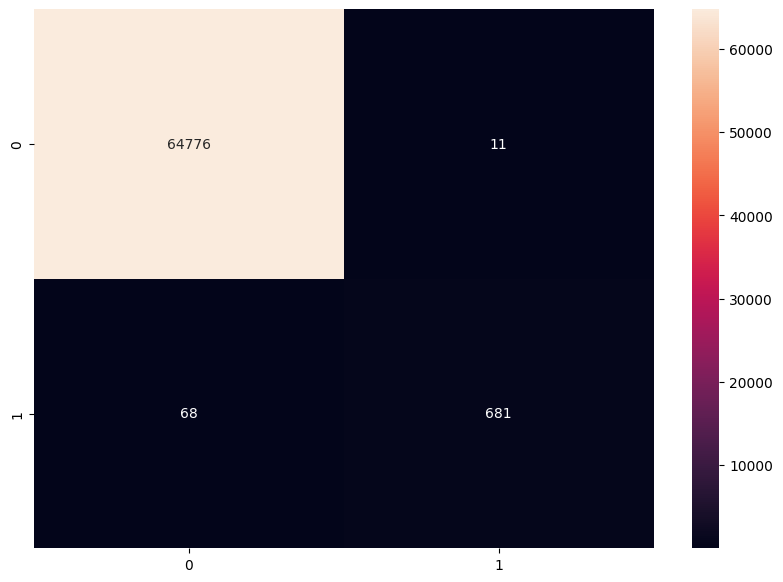

In [ ]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(matrix, index = [0,1],
                  columns = [0,1])
pyplot.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True, fmt="g" )

plt.savefig('foo.png')


In [ ]:
import tensorflow as tf
m = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])
m.update_state([0, 1, 1, 1, 0],
               [0, 1, 1, 0, 0])
print("kết quả: ", m.result().numpy())

kết quả:  0.6666667


<Axes: >

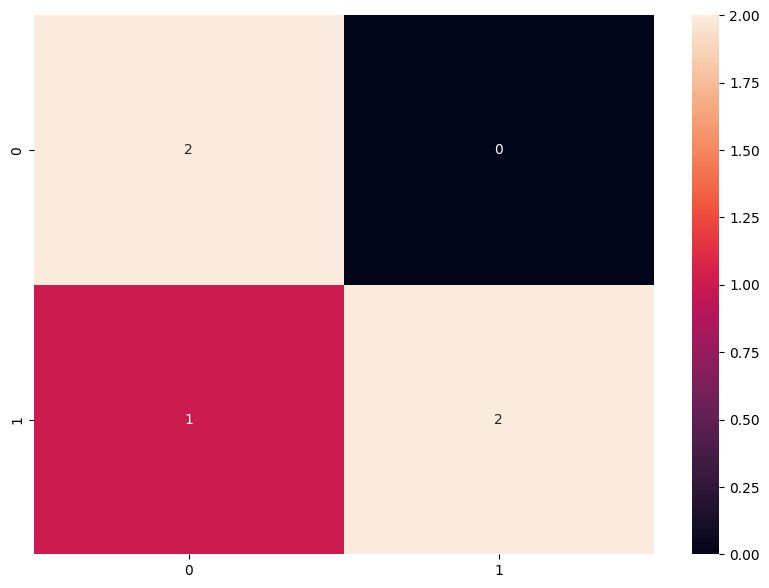

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

groundTrue = np.array([0, 1, 1, 1, 0])
prediction = np.array([0, 1, 1, 0, 0])
matrix = confusion_matrix(groundTrue, prediction)

df_cm = pd.DataFrame(matrix, index = [0,1],
                  columns = [0,1])
pyplot.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True, fmt="g" )
